# Exploratory Data Analysis: YFinance Historical Stock Data

## 1. Introduction
This notebook performs exploratory data analysis on historical stock data for major tech companies including:
- AAPL (Apple)
- AMZN (Amazon)
- GOOG (Google)
- META (Meta/Facebook)
- MSFT (Microsoft)
- NVDA (NVIDIA)
- TSLA (Tesla)

The data includes daily stock prices and trading volumes from YFinance.

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Set plot style
plt.style.use('seaborn-v0_8')  # Changed from 'seaborn' to 'seaborn-v0_8'
sns.set_theme()

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

## 2. Load the Data

In [2]:
# Define data directory - using absolute path from workspace root
data_dir = Path('data/yfinance_data')

# List of stock files
stock_files = {
    'AAPL': 'AAPL_historical_data.csv',
    'AMZN': 'AMZN_historical_data.csv',
    'GOOG': 'GOOG_historical_data.csv',
    'META': 'META_historical_data.csv',
    'MSFT': 'MSFT_historical_data.csv',
    'NVDA': 'NVDA_historical_data.csv',
    'TSLA': 'TSLA_historical_data.csv'
}

# Load all stock data into a dictionary
stock_data = {}
for ticker, file in stock_files.items():
    df = pd.read_csv(data_dir / file)
    df['Date'] = pd.to_datetime(df['Date'])
    df.set_index('Date', inplace=True)
    stock_data[ticker] = df

## 3. Data Quality Check

In [3]:
# Check for missing values
print("Missing Values:")
for ticker, df in stock_data.items():
    print(f"\n{ticker}:")
    display(df.isnull().sum())

# Check data types
print("\nData Types:")
for ticker, df in stock_data.items():
    print(f"\n{ticker}:")
    display(df.dtypes)

# Check for duplicates
print("\nDuplicate Dates:")
for ticker, df in stock_data.items():
    duplicates = df.index.duplicated().sum()
    print(f"{ticker}: {duplicates} duplicate dates")

Missing Values:

AAPL:


Open            0
High            0
Low             0
Close           0
Adj Close       0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64


AMZN:


Open            0
High            0
Low             0
Close           0
Adj Close       0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64


GOOG:


Open            0
High            0
Low             0
Close           0
Adj Close       0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64


META:


Open            0
High            0
Low             0
Close           0
Adj Close       0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64


MSFT:


Open            0
High            0
Low             0
Close           0
Adj Close       0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64


NVDA:


Open            0
High            0
Low             0
Close           0
Adj Close       0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64


TSLA:


Open            0
High            0
Low             0
Close           0
Adj Close       0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64


Data Types:

AAPL:


Open            float64
High            float64
Low             float64
Close           float64
Adj Close       float64
Volume            int64
Dividends       float64
Stock Splits    float64
dtype: object


AMZN:


Open            float64
High            float64
Low             float64
Close           float64
Adj Close       float64
Volume            int64
Dividends       float64
Stock Splits    float64
dtype: object


GOOG:


Open            float64
High            float64
Low             float64
Close           float64
Adj Close       float64
Volume            int64
Dividends       float64
Stock Splits    float64
dtype: object


META:


Open            float64
High            float64
Low             float64
Close           float64
Adj Close       float64
Volume            int64
Dividends       float64
Stock Splits    float64
dtype: object


MSFT:


Open            float64
High            float64
Low             float64
Close           float64
Adj Close       float64
Volume            int64
Dividends       float64
Stock Splits    float64
dtype: object


NVDA:


Open            float64
High            float64
Low             float64
Close           float64
Adj Close       float64
Volume            int64
Dividends       float64
Stock Splits    float64
dtype: object


TSLA:


Open            float64
High            float64
Low             float64
Close           float64
Adj Close       float64
Volume            int64
Dividends       float64
Stock Splits    float64
dtype: object


Duplicate Dates:
AAPL: 0 duplicate dates
AMZN: 0 duplicate dates
GOOG: 0 duplicate dates
META: 0 duplicate dates
MSFT: 0 duplicate dates
NVDA: 0 duplicate dates
TSLA: 0 duplicate dates


## 4. Feature Overview

In [7]:
# Calculate summary statistics for each stock
for ticker, df in stock_data.items():
    print(f"\nSummary Statistics for {ticker}:")
    display(df.describe())


Summary Statistics for AAPL:


,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
count,10998.00,10998.00,10998.00,10998.00,10998.00,10998.00,10998.00,10998.00
mean,22.30,22.54,22.07,22.31,21.49,318080644.37,0.00,0.00
std,46.00,46.50,45.54,46.04,45.56,335452346.64,0.01,0.08
min,0.05,0.05,0.05,0.05,0.04,0.00,0.00,0.00
25%,0.30,0.30,0.29,0.30,0.24,113254500.00,0.00,0.00
50%,0.53,0.54,0.52,0.53,0.43,205741200.00,0.00,0.00
75%,20.20,20.39,20.00,20.20,17.25,398527500.00,0.00,0.00
max,236.48,237.23,233.09,234.82,234.55,7421640800.00,0.25,7.00



Summary Statistics for AMZN:


,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
count,6846.00,6846.00,6846.00,6846.00,6846.00,6846.00,6846.00,6846.00
mean,37.36,37.80,36.88,37.35,37.35,138071264.08,0.00,0.00
std,53.76,54.37,53.09,53.73,53.73,138234617.48,0.00,0.25
min,0.07,0.07,0.07,0.07,0.07,9744000.00,0.00,0.00
25%,2.07,2.12,2.04,2.08,2.08,65054425.00,0.00,0.00
50%,8.57,8.67,8.47,8.59,8.59,102065000.00,0.00,0.00
75%,50.45,50.72,50.06,50.43,50.43,156756000.00,0.00,0.00
max,200.09,201.20,199.05,200.00,200.00,2086584000.00,0.00,20.00



Summary Statistics for GOOG:


,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
count,5020.00,5020.00,5020.00,5020.00,5020.00,5020.00,5020.00,5020.00
mean,45.25,45.73,44.80,45.27,45.22,115753944.84,0.00,0.00
std,43.34,43.82,42.92,43.38,43.33,149793615.57,0.00,0.28
min,2.47,2.53,2.39,2.49,2.49,158434.00,0.00,0.00
25%,13.03,13.15,12.88,13.03,13.02,27339500.00,0.00,0.00
50%,26.98,27.19,26.79,27.01,26.98,55854796.50,0.00,0.00
75%,60.22,60.76,59.81,60.28,60.21,142533254.75,0.00,0.00
max,191.75,193.31,190.62,192.66,192.66,1650832619.00,0.20,20.00



Summary Statistics for META:


,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
count,2926.00,2926.00,2926.00,2926.00,2926.00,2926.00,2926.00,2926.00
mean,179.56,181.88,177.32,179.65,179.31,28720832.19,0.00,0.00
std,108.86,110.26,107.51,108.91,108.76,22698110.52,0.01,0.00
min,22.99,23.09,22.67,22.90,22.85,5467500.00,0.00,0.00
25%,97.77,98.77,95.89,97.38,97.18,15713075.00,0.00,0.00
50%,166.87,168.85,164.21,166.86,166.51,21761000.00,0.00,0.00
75%,231.45,234.93,228.69,232.42,231.95,32944675.00,0.00,0.00
max,542.35,542.81,528.36,539.91,539.91,365457900.00,0.50,0.00



Summary Statistics for MSFT:


,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
count,9672.00,9672.00,9672.00,9672.00,9672.00,9672.00,9672.00,9672.00
mean,58.40,59.00,57.78,58.42,52.72,56776781.33,0.00,0.00
std,90.12,90.96,89.23,90.15,90.07,38141229.75,0.05,0.06
min,0.09,0.09,0.09,0.09,0.06,2304000.00,0.00,0.00
25%,5.70,5.77,5.62,5.70,3.51,32069825.00,0.00,0.00
50%,27.30,27.60,27.09,27.34,19.15,49902250.00,0.00,0.00
75%,46.69,47.10,46.14,46.66,38.34,70717875.00,0.00,0.00
max,467.00,468.35,464.46,467.56,466.72,1031788800.00,3.08,2.00



Summary Statistics for NVDA:


,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
count,6421.00,6421.00,6421.00,6421.00,6421.00,6421.00,6421.00,6421.00
mean,6.21,6.32,6.09,6.21,6.18,606079137.75,0.00,0.00
std,16.14,16.42,15.79,16.12,16.12,432348188.42,0.00,0.14
min,0.03,0.04,0.03,0.03,0.03,19680000.00,0.00,0.00
25%,0.28,0.29,0.27,0.28,0.25,345635000.00,0.00,0.00
50%,0.46,0.46,0.45,0.46,0.43,507000000.00,0.00,0.00
75%,4.18,4.24,4.12,4.18,4.13,736200000.00,0.00,0.00
max,139.80,140.76,132.42,135.58,135.58,9230856000.00,0.01,10.00



Summary Statistics for TSLA:


,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
count,3545.00,3545.00,3545.00,3545.00,3545.00,3545.00,3545.00,3545.00
mean,75.51,77.16,73.74,75.49,75.49,96997076.14,0.00,0.00
std,102.53,104.81,100.05,102.46,102.46,78668283.28,0.00,0.10
min,1.08,1.11,1.00,1.05,1.05,1777500.00,0.00,0.00
25%,11.52,11.86,11.22,11.57,11.57,47706000.00,0.00,0.00
50%,17.46,17.69,17.10,17.46,17.46,82506000.00,0.00,0.00
75%,161.88,165.33,158.36,161.48,161.48,122889000.00,0.00,0.00
max,411.47,414.50,405.67,409.97,409.97,914082000.00,0.00,5.00


## 5. Time Series Trends

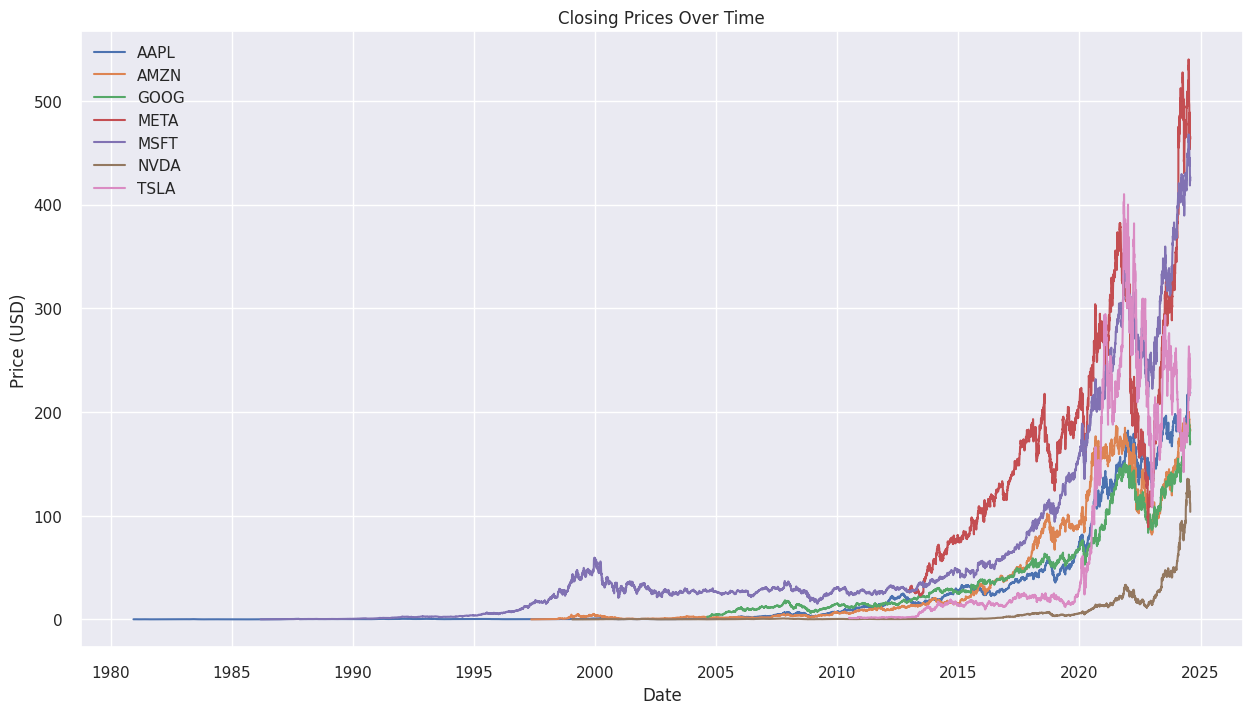

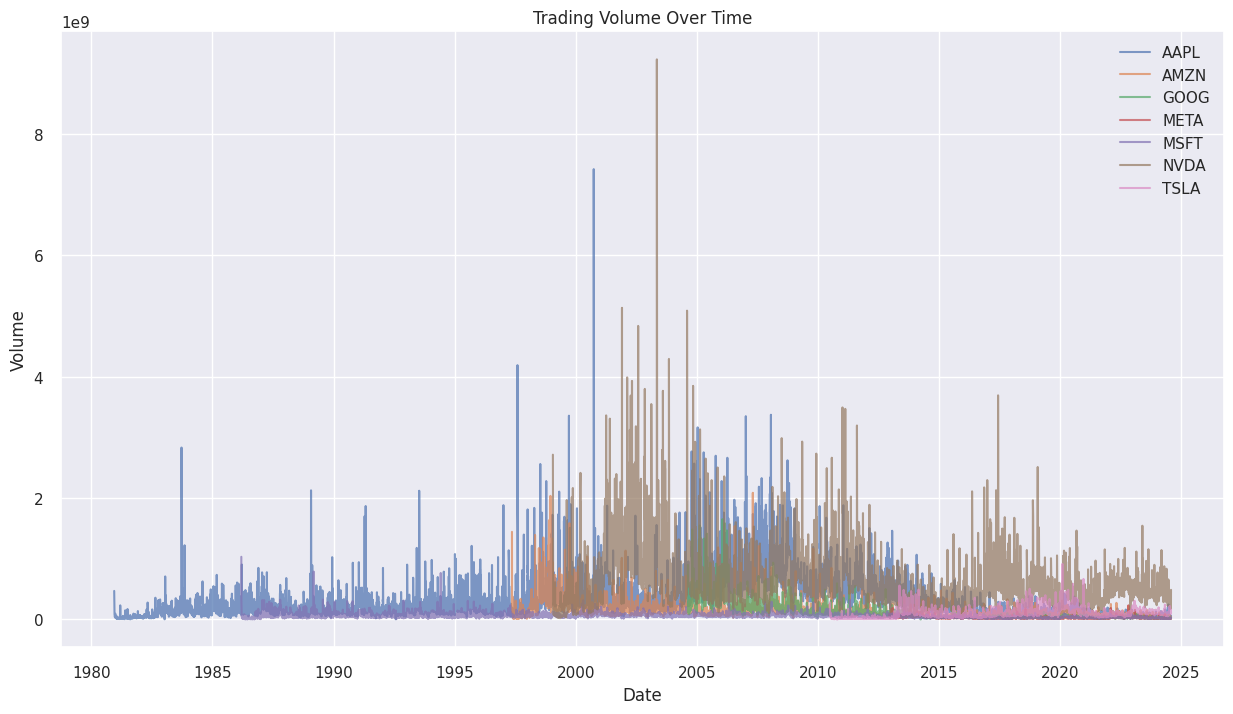

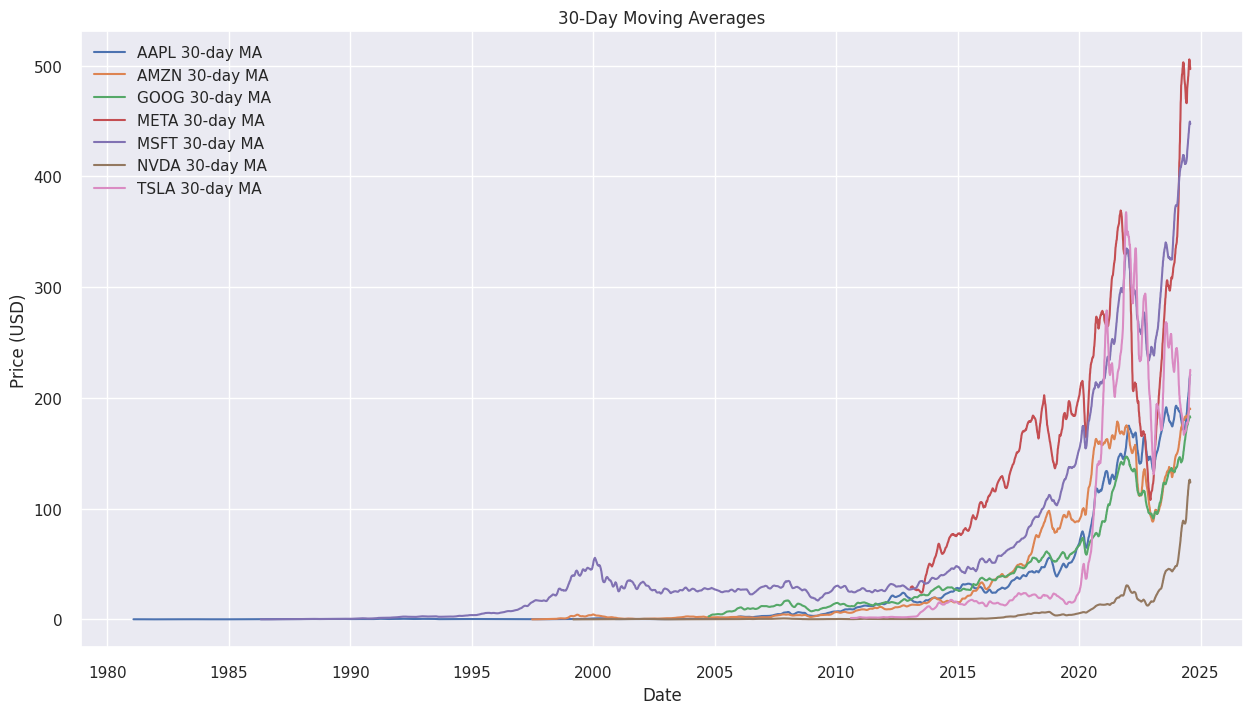

In [8]:
# Plot closing prices for all stocks
plt.figure(figsize=(15, 8))
for ticker, df in stock_data.items():
    plt.plot(df.index, df['Close'], label=ticker)

plt.title('Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

# Plot trading volumes
plt.figure(figsize=(15, 8))
for ticker, df in stock_data.items():
    plt.plot(df.index, df['Volume'], label=ticker, alpha=0.7)

plt.title('Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.grid(True)
plt.show()

# Calculate and plot 30-day moving averages
plt.figure(figsize=(15, 8))
for ticker, df in stock_data.items():
    ma_30 = df['Close'].rolling(window=30).mean()
    plt.plot(df.index, ma_30, label=f'{ticker} 30-day MA')

plt.title('30-Day Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

In [9]:
# c. Summary Statistics Analysis
print("Summary Statistics for Each Stock:")
for ticker, df in stock_data.items():
    print(f"\n{ticker} Summary Statistics:")
    display(df.describe())
    
    # Check for unrealistic values
    print(f"\n{ticker} Price Range Check:")
    print(f"Min Close Price: ${df['Close'].min():.2f}")
    print(f"Max Close Price: ${df['Close'].max():.2f}")
    print(f"Min Volume: {df['Volume'].min():,.0f}")
    print(f"Max Volume: {df['Volume'].max():,.0f}")


Summary Statistics for Each Stock:

AAPL Summary Statistics:


,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
count,10998.00,10998.00,10998.00,10998.00,10998.00,10998.00,10998.00,10998.00
mean,22.30,22.54,22.07,22.31,21.49,318080644.37,0.00,0.00
std,46.00,46.50,45.54,46.04,45.56,335452346.64,0.01,0.08
min,0.05,0.05,0.05,0.05,0.04,0.00,0.00,0.00
25%,0.30,0.30,0.29,0.30,0.24,113254500.00,0.00,0.00
50%,0.53,0.54,0.52,0.53,0.43,205741200.00,0.00,0.00
75%,20.20,20.39,20.00,20.20,17.25,398527500.00,0.00,0.00
max,236.48,237.23,233.09,234.82,234.55,7421640800.00,0.25,7.00



AAPL Price Range Check:
Min Close Price: $0.05
Max Close Price: $234.82
Min Volume: 0
Max Volume: 7,421,640,800

AMZN Summary Statistics:


,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
count,6846.00,6846.00,6846.00,6846.00,6846.00,6846.00,6846.00,6846.00
mean,37.36,37.80,36.88,37.35,37.35,138071264.08,0.00,0.00
std,53.76,54.37,53.09,53.73,53.73,138234617.48,0.00,0.25
min,0.07,0.07,0.07,0.07,0.07,9744000.00,0.00,0.00
25%,2.07,2.12,2.04,2.08,2.08,65054425.00,0.00,0.00
50%,8.57,8.67,8.47,8.59,8.59,102065000.00,0.00,0.00
75%,50.45,50.72,50.06,50.43,50.43,156756000.00,0.00,0.00
max,200.09,201.20,199.05,200.00,200.00,2086584000.00,0.00,20.00



AMZN Price Range Check:
Min Close Price: $0.07
Max Close Price: $200.00
Min Volume: 9,744,000
Max Volume: 2,086,584,000

GOOG Summary Statistics:


,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
count,5020.00,5020.00,5020.00,5020.00,5020.00,5020.00,5020.00,5020.00
mean,45.25,45.73,44.80,45.27,45.22,115753944.84,0.00,0.00
std,43.34,43.82,42.92,43.38,43.33,149793615.57,0.00,0.28
min,2.47,2.53,2.39,2.49,2.49,158434.00,0.00,0.00
25%,13.03,13.15,12.88,13.03,13.02,27339500.00,0.00,0.00
50%,26.98,27.19,26.79,27.01,26.98,55854796.50,0.00,0.00
75%,60.22,60.76,59.81,60.28,60.21,142533254.75,0.00,0.00
max,191.75,193.31,190.62,192.66,192.66,1650832619.00,0.20,20.00



GOOG Price Range Check:
Min Close Price: $2.49
Max Close Price: $192.66
Min Volume: 158,434
Max Volume: 1,650,832,619

META Summary Statistics:


,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
count,2926.00,2926.00,2926.00,2926.00,2926.00,2926.00,2926.00,2926.00
mean,179.56,181.88,177.32,179.65,179.31,28720832.19,0.00,0.00
std,108.86,110.26,107.51,108.91,108.76,22698110.52,0.01,0.00
min,22.99,23.09,22.67,22.90,22.85,5467500.00,0.00,0.00
25%,97.77,98.77,95.89,97.38,97.18,15713075.00,0.00,0.00
50%,166.87,168.85,164.21,166.86,166.51,21761000.00,0.00,0.00
75%,231.45,234.93,228.69,232.42,231.95,32944675.00,0.00,0.00
max,542.35,542.81,528.36,539.91,539.91,365457900.00,0.50,0.00



META Price Range Check:
Min Close Price: $22.90
Max Close Price: $539.91
Min Volume: 5,467,500
Max Volume: 365,457,900

MSFT Summary Statistics:


,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
count,9672.00,9672.00,9672.00,9672.00,9672.00,9672.00,9672.00,9672.00
mean,58.40,59.00,57.78,58.42,52.72,56776781.33,0.00,0.00
std,90.12,90.96,89.23,90.15,90.07,38141229.75,0.05,0.06
min,0.09,0.09,0.09,0.09,0.06,2304000.00,0.00,0.00
25%,5.70,5.77,5.62,5.70,3.51,32069825.00,0.00,0.00
50%,27.30,27.60,27.09,27.34,19.15,49902250.00,0.00,0.00
75%,46.69,47.10,46.14,46.66,38.34,70717875.00,0.00,0.00
max,467.00,468.35,464.46,467.56,466.72,1031788800.00,3.08,2.00



MSFT Price Range Check:
Min Close Price: $0.09
Max Close Price: $467.56
Min Volume: 2,304,000
Max Volume: 1,031,788,800

NVDA Summary Statistics:


,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
count,6421.00,6421.00,6421.00,6421.00,6421.00,6421.00,6421.00,6421.00
mean,6.21,6.32,6.09,6.21,6.18,606079137.75,0.00,0.00
std,16.14,16.42,15.79,16.12,16.12,432348188.42,0.00,0.14
min,0.03,0.04,0.03,0.03,0.03,19680000.00,0.00,0.00
25%,0.28,0.29,0.27,0.28,0.25,345635000.00,0.00,0.00
50%,0.46,0.46,0.45,0.46,0.43,507000000.00,0.00,0.00
75%,4.18,4.24,4.12,4.18,4.13,736200000.00,0.00,0.00
max,139.80,140.76,132.42,135.58,135.58,9230856000.00,0.01,10.00



NVDA Price Range Check:
Min Close Price: $0.03
Max Close Price: $135.58
Min Volume: 19,680,000
Max Volume: 9,230,856,000

TSLA Summary Statistics:


,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
count,3545.00,3545.00,3545.00,3545.00,3545.00,3545.00,3545.00,3545.00
mean,75.51,77.16,73.74,75.49,75.49,96997076.14,0.00,0.00
std,102.53,104.81,100.05,102.46,102.46,78668283.28,0.00,0.10
min,1.08,1.11,1.00,1.05,1.05,1777500.00,0.00,0.00
25%,11.52,11.86,11.22,11.57,11.57,47706000.00,0.00,0.00
50%,17.46,17.69,17.10,17.46,17.46,82506000.00,0.00,0.00
75%,161.88,165.33,158.36,161.48,161.48,122889000.00,0.00,0.00
max,411.47,414.50,405.67,409.97,409.97,914082000.00,0.00,5.00



TSLA Price Range Check:
Min Close Price: $1.05
Max Close Price: $409.97
Min Volume: 1,777,500
Max Volume: 914,082,000


In [10]:
# d. Date Range Analysis
print("\nDate Range Analysis:")
for ticker, df in stock_data.items():
    print(f"\n{ticker}:")
    print(f"Date Range: {df.index.min()} to {df.index.max()}")
    print(f"Number of Trading Days: {len(df)}")
    
    # Check for gaps in trading days
    expected_days = pd.date_range(start=df.index.min(), end=df.index.max(), freq='B')
    missing_days = expected_days.difference(df.index)
    print(f"Number of Missing Trading Days: {len(missing_days)}")
    if len(missing_days) > 0:
        print("First few missing dates:", missing_days[:5].tolist())



Date Range Analysis:

AAPL:
Date Range: 1980-12-12 00:00:00 to 2024-07-30 00:00:00
Number of Trading Days: 10998
Number of Missing Trading Days: 385
First few missing dates: [Timestamp('1980-12-25 00:00:00'), Timestamp('1981-01-01 00:00:00'), Timestamp('1981-02-16 00:00:00'), Timestamp('1981-04-17 00:00:00'), Timestamp('1981-05-25 00:00:00')]

AMZN:
Date Range: 1997-05-15 00:00:00 to 2024-07-30 00:00:00
Number of Trading Days: 6846
Number of Missing Trading Days: 253
First few missing dates: [Timestamp('1997-05-26 00:00:00'), Timestamp('1997-07-04 00:00:00'), Timestamp('1997-09-01 00:00:00'), Timestamp('1997-11-27 00:00:00'), Timestamp('1997-12-25 00:00:00')]

GOOG:
Date Range: 2004-08-19 00:00:00 to 2024-07-30 00:00:00
Number of Trading Days: 5020
Number of Missing Trading Days: 184
First few missing dates: [Timestamp('2004-09-06 00:00:00'), Timestamp('2004-11-25 00:00:00'), Timestamp('2004-12-24 00:00:00'), Timestamp('2005-01-17 00:00:00'), Timestamp('2005-02-21 00:00:00')]

META:
D

In [11]:
# e. Anomaly Detection
print("\nAnomaly Detection:")
for ticker, df in stock_data.items():
    print(f"\n{ticker} Anomalies:")
    
    # Check for zero or negative prices
    price_anomalies = df[df['Close'] <= 0]
    if len(price_anomalies) > 0:
        print(f"Found {len(price_anomalies)} days with zero or negative prices")
        display(price_anomalies)
    
    # Check for zero volume
    zero_volume = df[df['Volume'] == 0]
    if len(zero_volume) > 0:
        print(f"Found {len(zero_volume)} days with zero volume")
        display(zero_volume)
    
    # Check for volume spikes (more than 3 standard deviations from mean)
    volume_mean = df['Volume'].mean()
    volume_std = df['Volume'].std()
    volume_spikes = df[df['Volume'] > (volume_mean + 3 * volume_std)]
    if len(volume_spikes) > 0:
        print(f"Found {len(volume_spikes)} days with unusually high volume")
        display(volume_spikes[['Volume']].head())



Anomaly Detection:

AAPL Anomalies:
Found 1 days with zero volume


,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
Date,,,,,,,,
1981-08-10,0.11,0.11,0.11,0.11,0.09,0,0.00,0.00


Found 208 days with unusually high volume


,Volume
Date,
1983-09-23,2832345600
1989-01-27,2127171200
1991-04-15,1700384000
1991-05-01,1868372800
1993-07-16,2120596800



AMZN Anomalies:
Found 145 days with unusually high volume


,Volume
Date,
1997-05-15,1443120000
1998-04-28,1391880000
1998-04-29,633144000
1998-06-11,717024000
1998-06-15,674028000



GOOG Anomalies:
Found 106 days with unusually high volume


,Volume
Date,
2004-08-19,897427216
2004-09-29,613229953
2004-10-21,585767401
2004-10-22,1481207196
2004-10-25,1315480331



META Anomalies:
Found 51 days with unusually high volume


,Volume
Date,
2013-01-09,104787700
2013-01-14,98892800
2013-01-15,173242600
2013-01-31,190744900
2013-05-02,104257000



MSFT Anomalies:
Found 130 days with unusually high volume


,Volume
Date,
1986-03-13,1031788800
1986-03-14,308160000
1986-11-24,173836800
1987-01-23,317894400
1987-02-12,185731200



NVDA Anomalies:
Found 107 days with unusually high volume


,Volume
Date,
1999-01-22,2714688000
1999-08-19,1966992000
1999-11-03,2011680000
1999-11-19,2165184000
2000-03-07,1952208000



TSLA Anomalies:
Found 72 days with unusually high volume


,Volume
Date,
2013-05-09,429075000
2013-05-10,376239000
2013-05-13,336253500
2013-05-14,557458500
2013-05-29,376492500


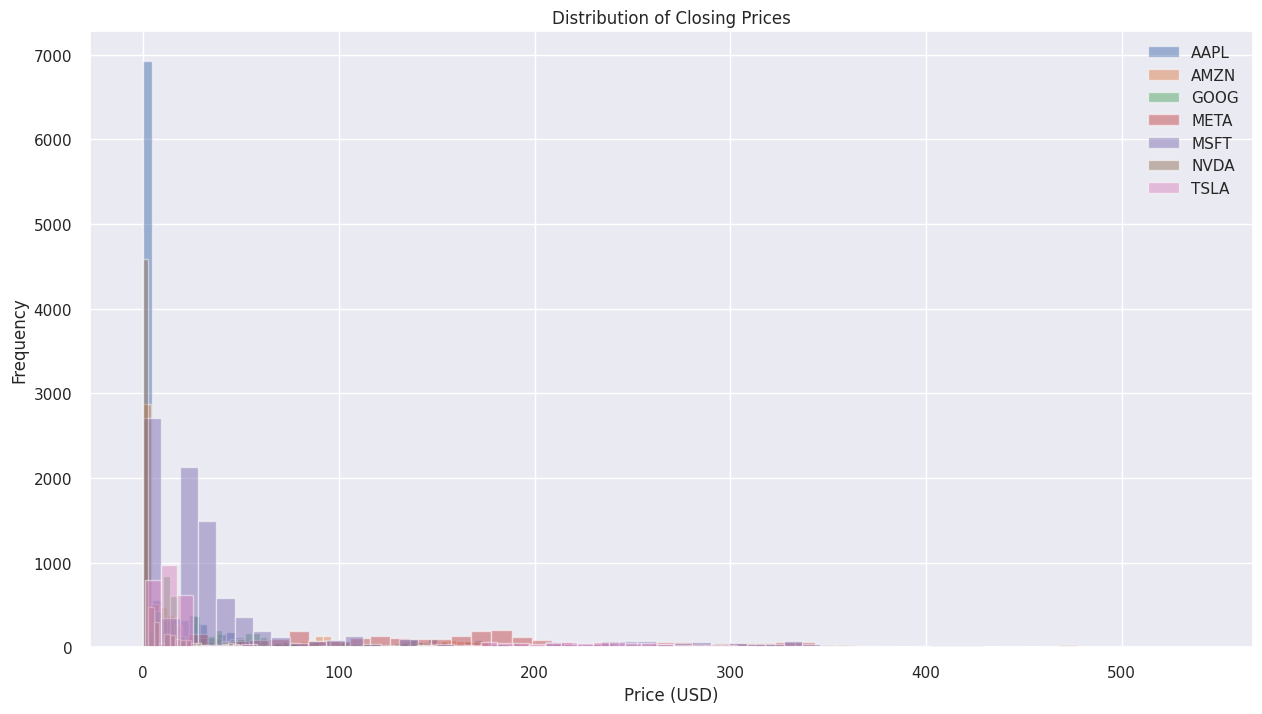

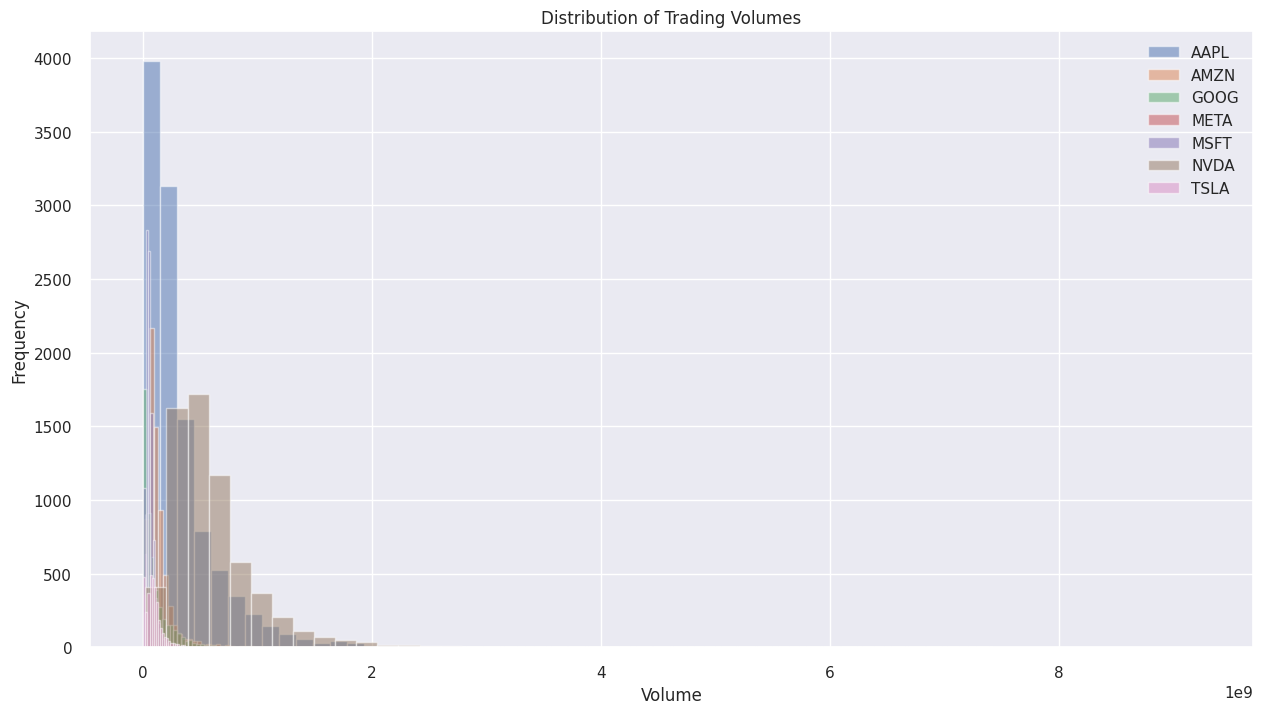

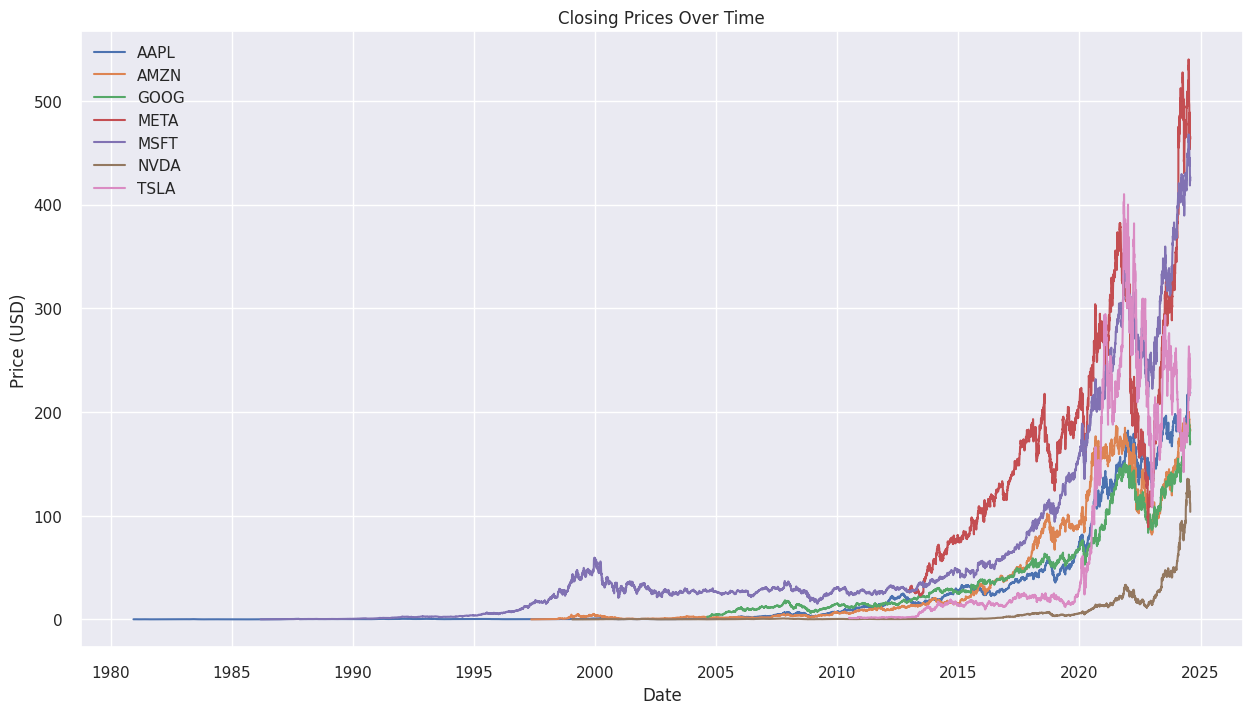

In [12]:
# Visualize price distributions
plt.figure(figsize=(15, 8))
for ticker, df in stock_data.items():
    plt.hist(df['Close'], bins=50, alpha=0.5, label=ticker)
plt.title('Distribution of Closing Prices')
plt.xlabel('Price (USD)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Visualize volume distributions
plt.figure(figsize=(15, 8))
for ticker, df in stock_data.items():
    plt.hist(df['Volume'], bins=50, alpha=0.5, label=ticker)
plt.title('Distribution of Trading Volumes')
plt.xlabel('Volume')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Plot price ranges over time
plt.figure(figsize=(15, 8))
for ticker, df in stock_data.items():
    plt.plot(df.index, df['Close'], label=ticker)
plt.title('Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

## 6. Preliminary Insights

### Key Observations:
1. Data Quality:
   - [To be filled after running the analysis]

2. Price Trends:
   - [To be filled after running the analysis]

3. Volume Analysis:
   - [To be filled after running the analysis]

### Next Steps:
1. [To be determined based on findings]
2. [To be determined based on findings]